## Hydrogen abstraction of methane by chlorine atoms: microkinetic simulation

Simulate a microkinetics system using calculated reaction rate constants.

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from overreact import api
from overreact import datasets

sns.set(style="white", palette="colorblind")

In [2]:
temperature = 298.15
basisset = "6-311G(2df,2pd)"  # 6-311G(2df,2p) best predicts activation enthalpy
model = api.parse_model(
    os.path.join(datasets.data_path, f"tanaka1996/UMP2/{basisset}/model.k")
)
k_eck = api.get_k(
    model.scheme, model.compounds, temperature=temperature, scale="M-1 s-1"
)

y0_CH4 = 772e-3 / (np.sum(model.compounds["CH4"].atommasses) * 1e3)
y0_Cl = 1 / (np.sum(model.compounds["Cl·"].atommasses) * 1e3)
y0_HCl = 1 / (np.sum(model.compounds["HCl"].atommasses) * 1e3)
y0 = [y0_CH4, y0_Cl, 0.0, 0.0, y0_HCl]

y0

assuming zero rotational energy for atomic system
assuming zero vibrational energy for atomic system
assuming zero rotational entropy for atomic system
assuming zero vibrational entropy for atomic system
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero temperature
assuming rotational energy zero at zero temperature
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero vibrational energy for atomic system
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero temperature
assuming rotational energy zero at zero temperature
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero tempera

[4.8120675684099e-05, 2.8206357713028517e-05, 0.0, 0.0, 2.7426565371218556e-05]

In [3]:
dydt = api.get_dydt(model.scheme, k_eck)
y, r = api.get_y(dydt, y0=y0)

model.scheme.compounds

('CH4', 'Cl·', 'H3CHCl‡', 'CH3·', 'HCl')

In [4]:
y(y.t_max)

array([ 1.99143180e-05, -1.84677880e-16,  0.00000000e+00,  2.82063577e-05,
        5.56329231e-05])

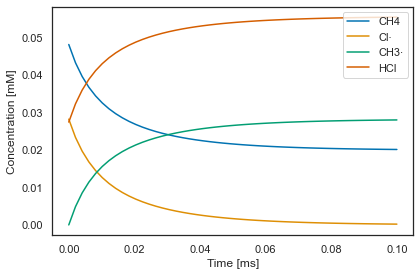

In [5]:
t = np.linspace(y.t_min, 1e-4)

fig, ax = plt.subplots()
for i, name in enumerate(model.scheme.compounds):
    if not api.is_transition_state(name):
        ax.plot(1e3 * t, 1e3 * y(t)[i], label=f"{name}")

ax.set_ylabel("Concentration [mM]")
ax.set_xlabel("Time [ms]")

ax.legend()
fig.tight_layout()